<h1 style="text-align:center;color:blue">Don't forget to Upvote if you like it.😊</h1>

# **Introduction**


In this kernal we will going through the whole process of creating a Machine Learning on the Titanic dataset. It provides us a glance over the fate of the passenger onboard the "Unsinkable" ship which sinked. The dataset categorizes the passanger based on their economic status, sex, age and their survival. In this kernel, we will be analyzing, cleaning and visulizing the data in different forms to obtain hidden insights. Also, we'll create different ML models and depending upon their accuracies, use the most suitable model for the prediction.

<center><h1>Importing Libraries</h1></center>

**Numpy : Python Library used for working with arrays<br>
Matplotlib : Used for data visualizations. ex: to plot the relations between various factors<br>
Seaborn: used for data visualization like matplotlib<br>
Pandas: used for data analysis and manipulation<br>**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train_and_test2.csv


<h1>Importing Dataset</h1>

In [2]:
df=pd.read_csv('/kaggle/input/titanic/train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


<h1>Data Preprocessing</h1>

<h4>Remove unnecessary columns like zero.1,zero.2..... using pandas dropna() method<br>
We will rename '2urvived' column as 'Survived' using rename method</h4>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

In [4]:
df.drop(['zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'],axis=1,inplace=True)
df.rename(columns={'2urvived':'Survived'},inplace=True) 
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,Survived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


**Remove the rows having null values**

In [5]:
df.dropna(inplace=True)

<h1>Data Visualization</h1>

**Heatmap of Co-Relation of various columns with each other
df.corr() shows the relation between various feature and we hence we can see the influence of the features on each other**

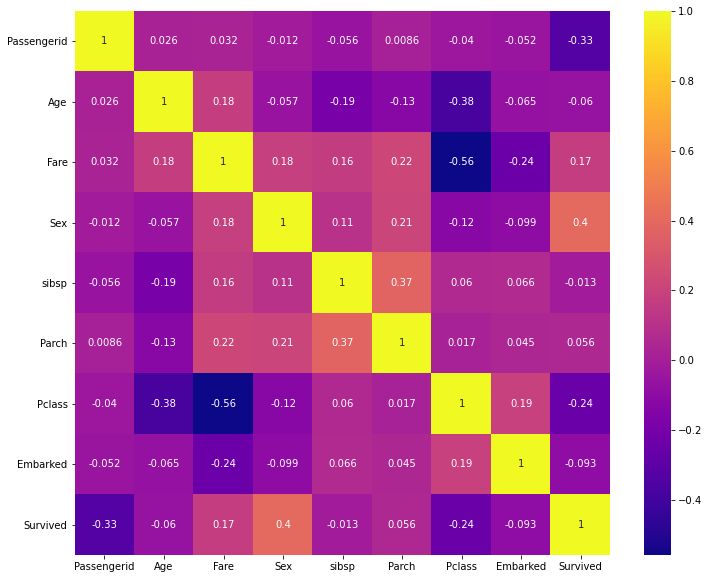

In [6]:
plt.figure(figsize=(12,10))
# we keep annot=True to make the values appear of df.corr() appear on the heatmap
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.plasma)

**Below we use pairplot method from seaborn library. It is used to plot graphs between the various features.**

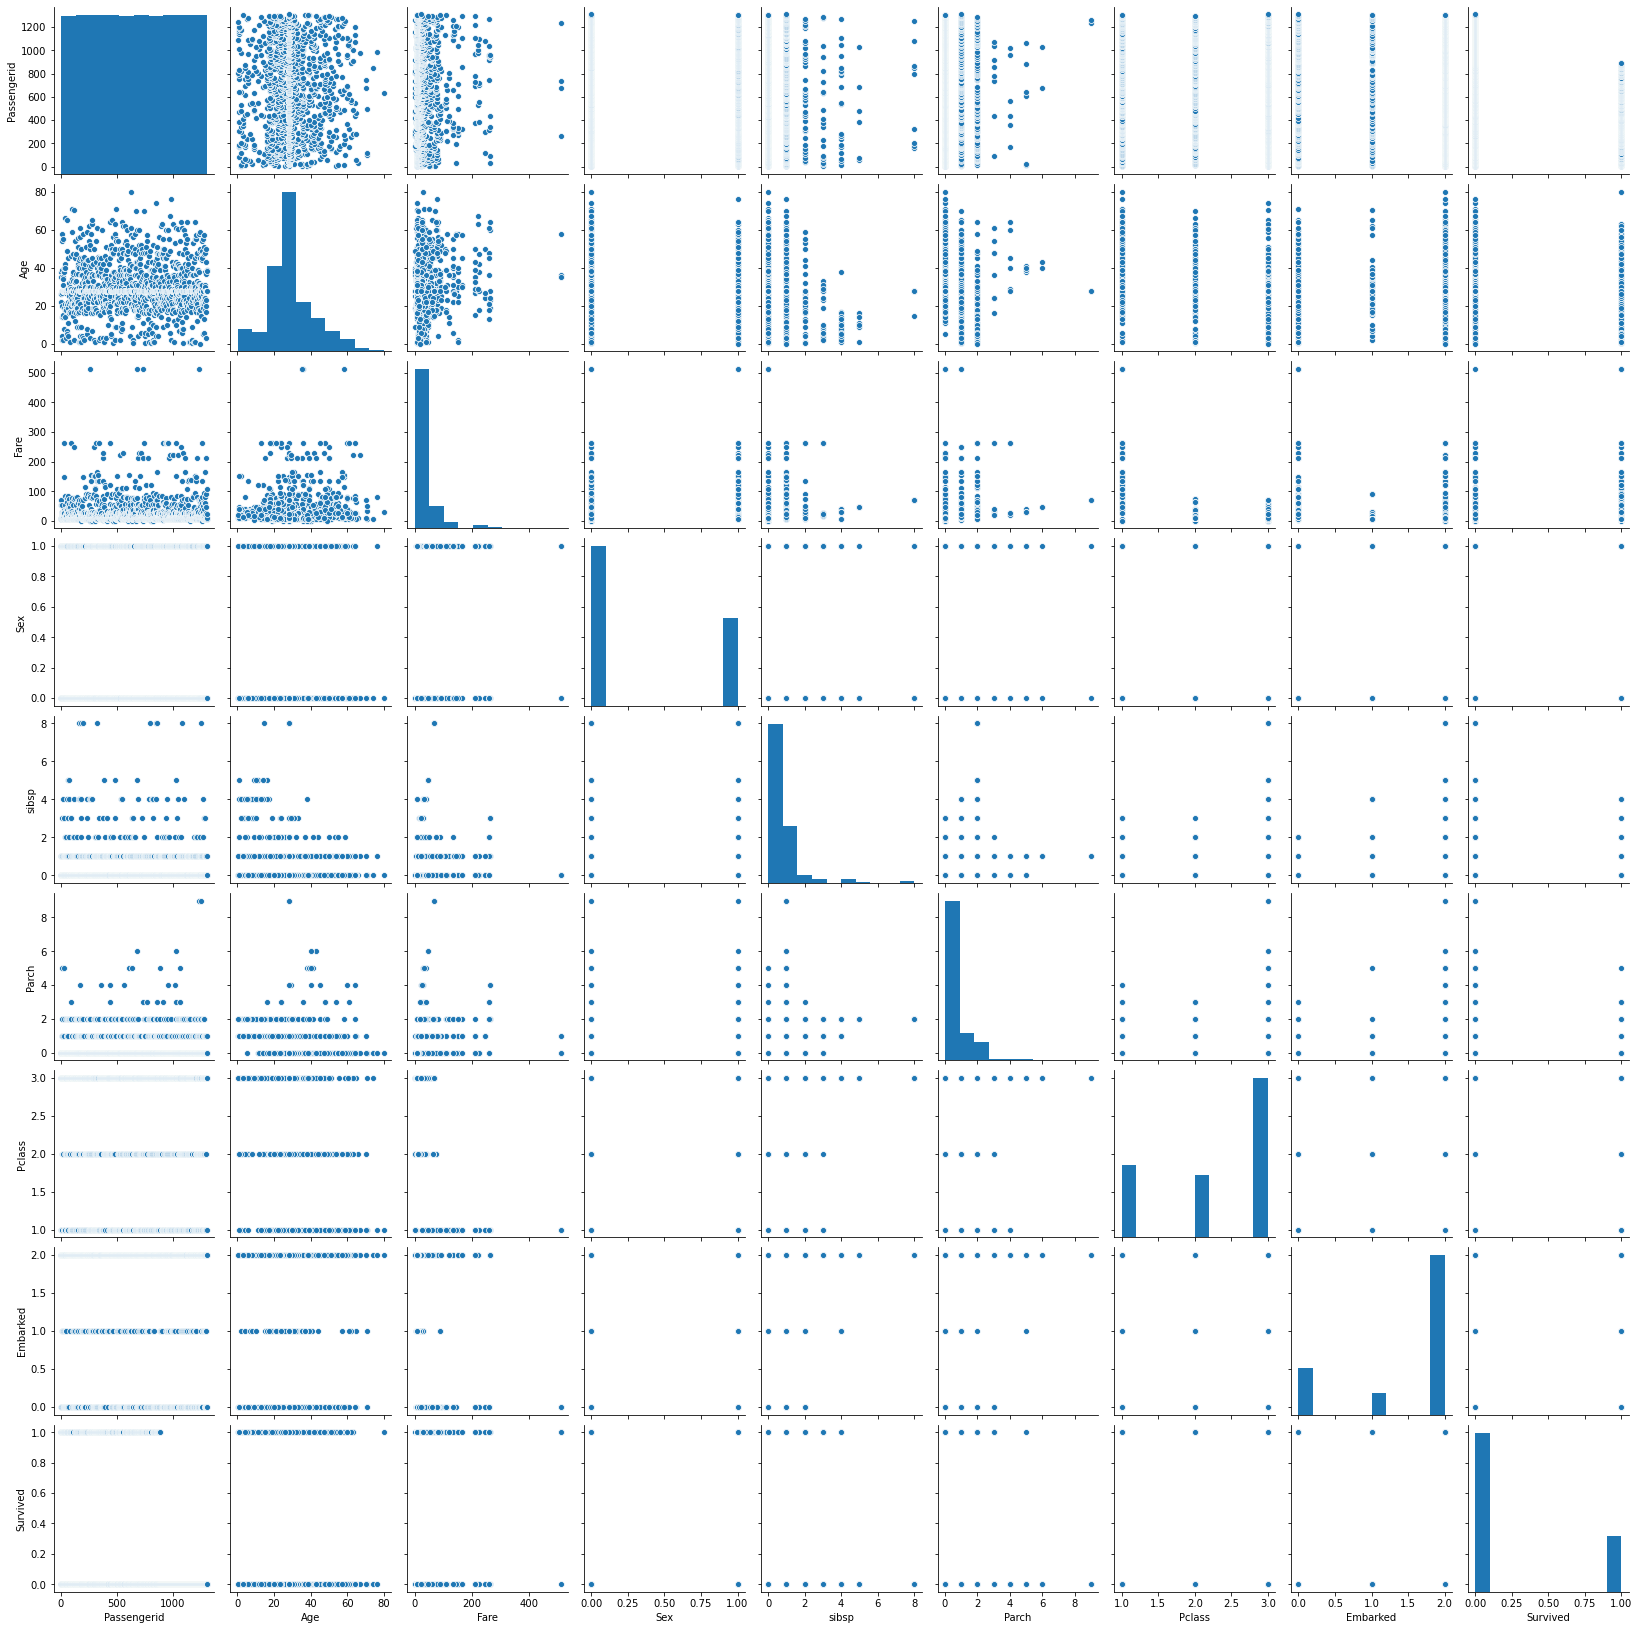

In [7]:
sns.pairplot(df)

**Let's see the various columns in df**

In [8]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'Pclass',
       'Embarked', 'Survived'],
      dtype='object')

# **Building and Training the Model**

**We will split the data for training and testing using train_test_split**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X=df.drop(['Survived'],axis=1)
Y=df['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


<h3>1)Logistic Regression</h3>

In [10]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=300)
lr.fit(X_train,y_train)
yhat=lr.predict(X_test)
print("Accuracy of Logistic Model is:",accuracy_score(yhat,y_test))

Accuracy of Logistic Model is: 0.8435114503816794


<h3>Let's visualize the data using confusion matrix</h3>
<span style="color:red"><b>For those who don't know about Confusion Matrix:<br><br> A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.</b></span>

Text(33.0, 0.5, 'Actual')

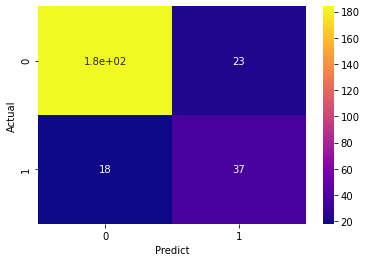

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
ax=confusion_matrix(yhat,y_test)
sns.heatmap(ax,annot=True,cmap=plt.cm.plasma)
plt.xlabel('Predict')
plt.ylabel('Actual')

<h3>2) K-Nearest Neighbor</h3>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=3)
KN.fit(X_train,y_train)
yhat=KN.predict(X_test)
print("Accuracy of K-Nearest Neighbor Model is:",accuracy_score(yhat,y_test))

Accuracy of K-Nearest Neighbor Model is: 0.7938931297709924


<h1>Best Model</h1>

<h3 style="color:blue">We see that the best model for the prediction is Logistic Regression with a accuracy of 0.843</h3>

<center><h3>Thank you for reading my notebook and don't forget to upvote the notebook</h3></center>